In [1]:
#!pip install pyarrow

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pyarrow as pa
import pyarrow.parquet as pq
import time

# too see max columns
pd.set_option('display.max_columns',None)

In [8]:
churn_df = pd.read_parquet("../Data/churn.parquet")

In [12]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4836028,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2166565,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,5724784,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,2630373,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1700858,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042995,5918432,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7042996,5548851,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7042997,6243950,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042998,3491389,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043000 entries, 0 to 7042999
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   customerID        int64  
 1   gender            object 
 2   SeniorCitizen     int64  
 3   Partner           object 
 4   Dependents        object 
 5   tenure            int64  
 6   PhoneService      object 
 7   MultipleLines     object 
 8   InternetService   object 
 9   OnlineSecurity    object 
 10  OnlineBackup      object 
 11  DeviceProtection  object 
 12  TechSupport       object 
 13  StreamingTV       object 
 14  StreamingMovies   object 
 15  Contract          object 
 16  PaperlessBilling  object 
 17  PaymentMethod     object 
 18  MonthlyCharges    float64
 19  TotalCharges      object 
 20  Churn             object 
dtypes: float64(1), int64(3), object(17)
memory usage: 1.1+ GB


In [11]:
churn_df.describe()

,customerID,SeniorCitizen,tenure,MonthlyCharges
count,7.043000e+06,7.043000e+06,7.043000e+06,7.043000e+06
mean,4.999925e+06,1.621468e-01,3.237115e+01,6.476169e+01
std,2.886951e+06,3.685855e-01,2.455774e+01,3.008791e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,1.825000e+01
25%,2.499645e+06,0.000000e+00,9.000000e+00,3.550000e+01
50%,4.998624e+06,0.000000e+00,2.900000e+01,7.035000e+01
75%,7.500639e+06,0.000000e+00,5.500000e+01,8.985000e+01
max,9.999997e+06,1.000000e+00,7.200000e+01,1.187500e+02


In [13]:
#count of string value into the column.
count=0
for i in churn_df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)

count of empty string:-  11000


In [16]:
# replace this empty string with nan
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(" ",np.nan)
# Change TotalCharges column to float
churn_df['TotalCharges'] = churn_df['TotalCharges'].astype(float)

In [18]:
# find null values
churn_df.isnull().sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges        11000
Churn                   0
dtype: int64

In [19]:
# replace null with mean
churn_df['TotalCharges'] = churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].mean())

In [21]:
#numerical variables
n = list(churn_df.select_dtypes(include=['int64','float64']).keys())
print(n)

['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
#categorical variables
c = list(churn_df.select_dtypes(include='O').keys())
print(c)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [25]:
# replace yes and No categorical variables with Yes = 1 and No = 0
for i in c:
    churn_df[i] = churn_df[i].replace('Yes',1)
    churn_df[i] = churn_df[i].replace('No',0)

In [ ]:
# replace male = 1 and female = 0
churn_df.gender = churn_df.gender.replace('Male',1)
churn_df.gender = churn_df.gender.replace('Female',0)

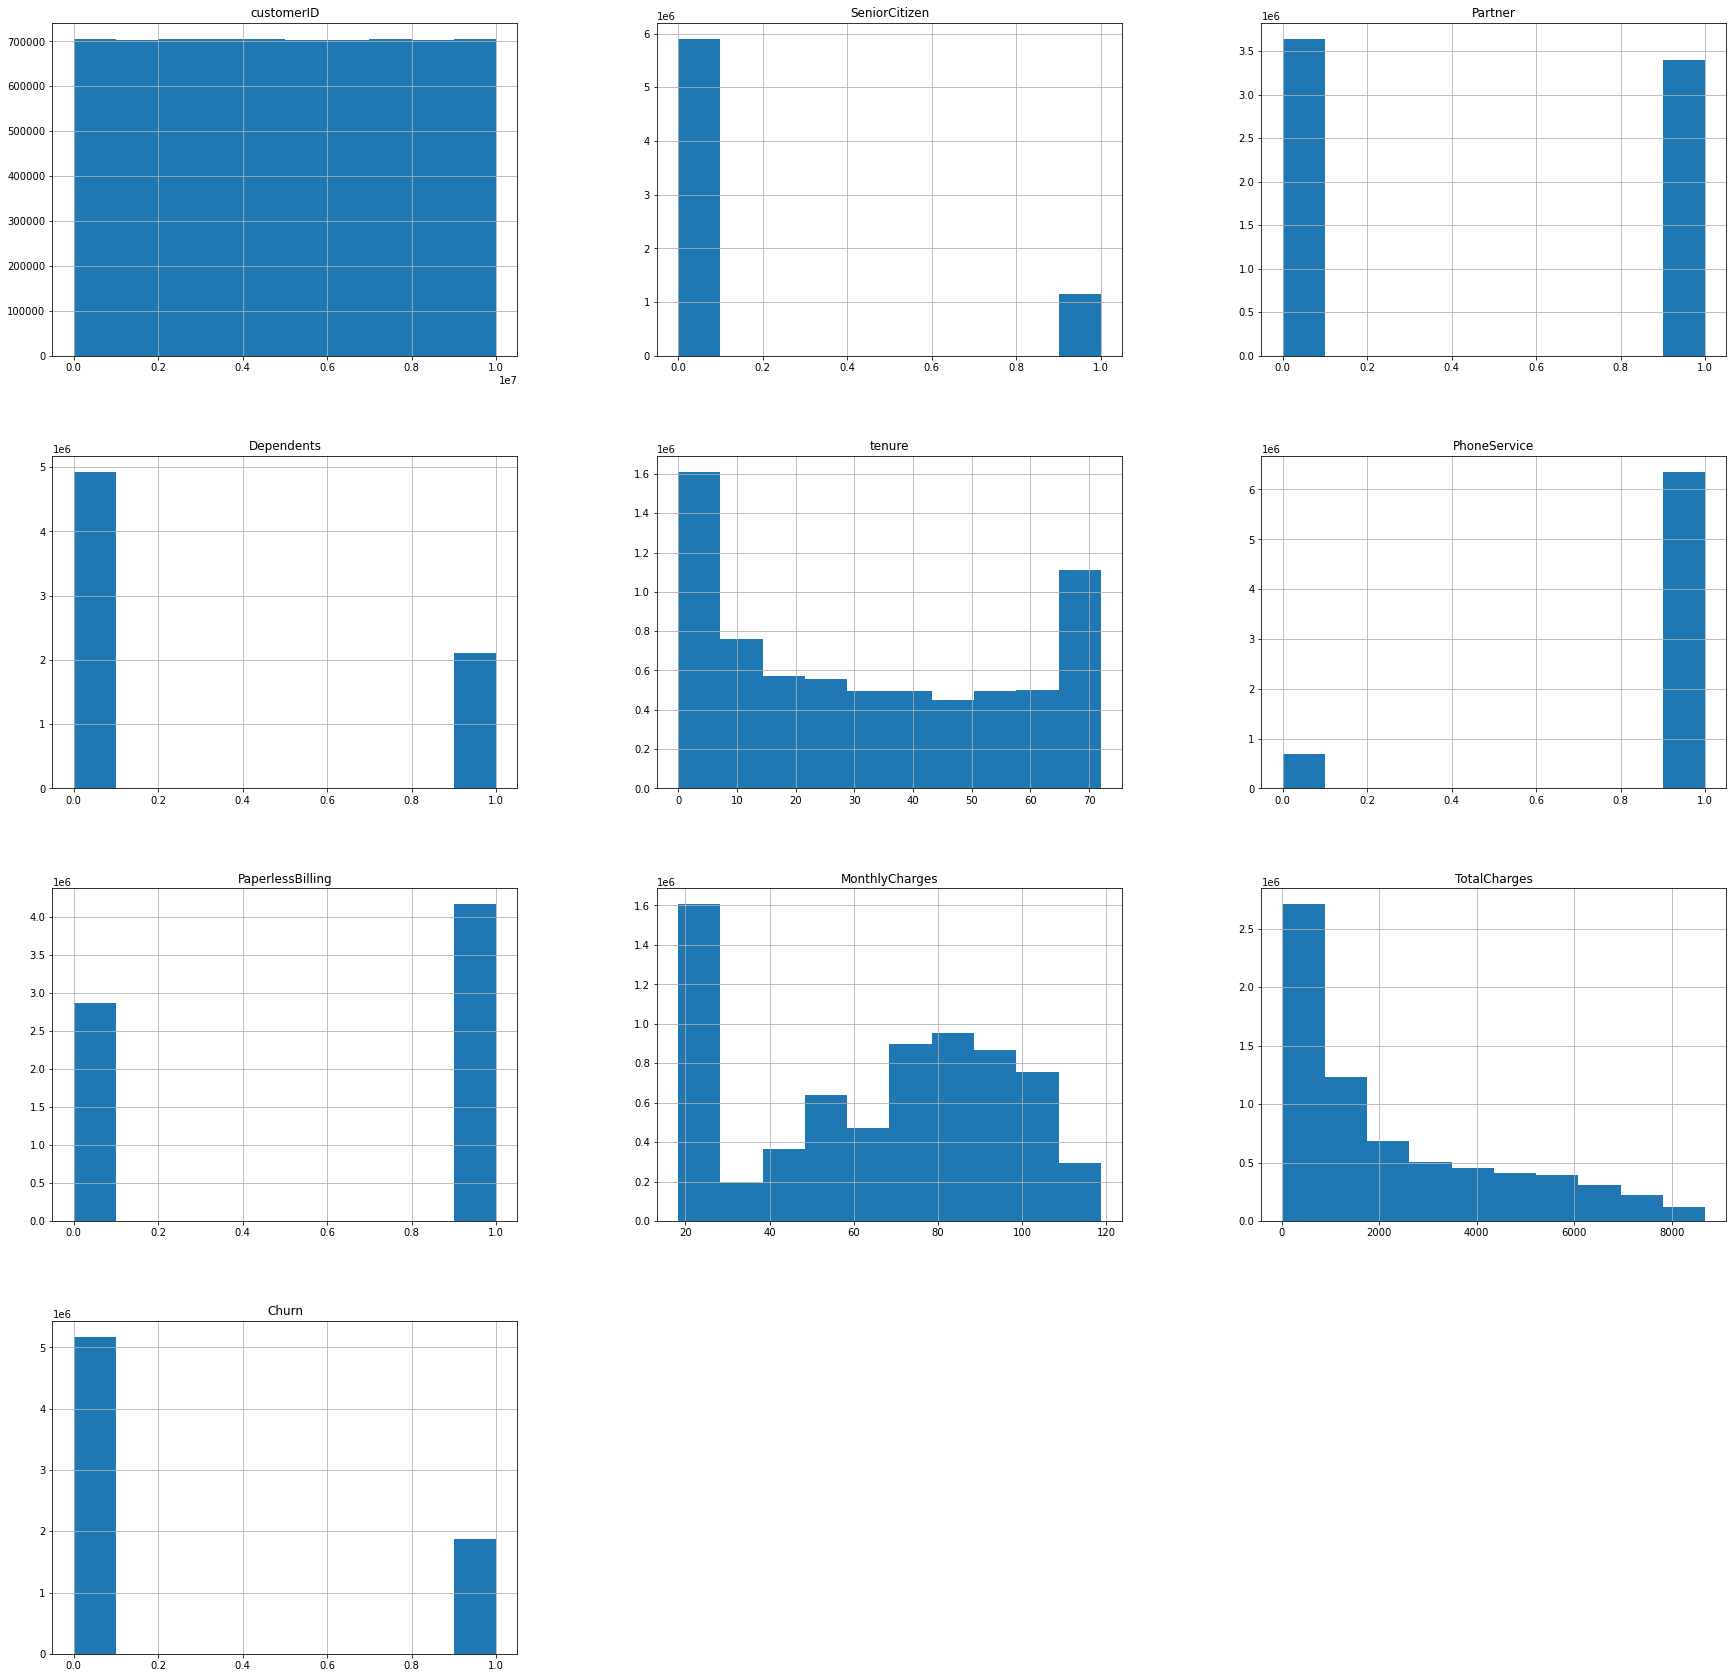

In [26]:
# Plot histogram of churn_df
churn_df.hist(figsize = (30, 30))
plt.show()